In [ ]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

path = '/content/gdrive/MyDrive/ML/SeoulBikeData.csv'
bike_df = pd.read_csv(path, encoding='cp1252')
print("Info:-")
bike_df.info()
print("Describe:-")
bike_df.describe()

Mounted at /content/gdrive
Info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Da

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#checking missing values
bike_df.isna().sum()
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#checking duplicate values
print('Duplicate values : ', len(bike_df[bike_df.duplicated()]))

Duplicate values :  0


In [ ]:
# Dependent variable is Rented Bike Count. 
# We will change this numerical output to a binary classification 
# Adding a new variable with threshold set 
threshold = bike_df['Rented Bike Count'].quantile(0.75)
threshold

1065.25

In [ ]:
# We set the threshold to 1065.25, which is the 75th percentile for Rented Bike Count.
# Every field with a bike count above 1065.25 will be labeled 1, 
# and rest will be labeled 0.
# threshold = 1065.25
bike_df["Rented_Bike_Count_Value"] = (bike_df['Rented Bike Count'] > threshold).astype(float)
bike_df.head(5000)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented_Bike_Count_Value
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,27/06/2018,152,3,19.4,97,2.9,282,18.9,0.00,0.0,0.0,Summer,No Holiday,Yes,0.0
4996,27/06/2018,110,4,19.2,97,1.0,217,18.7,0.00,0.5,0.0,Summer,No Holiday,Yes,0.0
4997,27/06/2018,162,5,19.1,97,1.2,402,18.6,0.00,0.0,0.0,Summer,No Holiday,Yes,0.0
4998,27/06/2018,417,6,19.2,97,1.5,157,18.7,0.00,0.0,0.0,Summer,No Holiday,Yes,0.0


DATA PREPROCESSING

In [ ]:
# Add few variables (split the date to month, year,weekday and day)
bike_df['Date']=pd.to_datetime(bike_df['Date'])
from datetime import datetime
import datetime as dt

bike_df['Year']=bike_df['Date'].dt.year
bike_df['Month']=bike_df['Date'].dt.month
bike_df['Day']=bike_df['Date'].dt.day
bike_df['DayName']=bike_df['Date'].dt.day_name()
bike_df['Weekday'] = bike_df['DayName'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','DayName','Year'],axis=1)

In [ ]:
#Holiday, Functioning Day and Seasons need to have dummy variables  (object DType)
bike_df = pd.get_dummies(bike_df, columns = ['Seasons',	'Holiday',	'Functioning Day'])

In [ ]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Day,Weekday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1


DECLARE FEATURE VECTOR AND TARGET VARIABLE

In [ ]:
# Split the features in X and Y
X = bike_df.drop(columns=['Rented_Bike_Count_Value','Rented Bike Count'], axis=1)
y = bike_df['Rented_Bike_Count_Value']

SPLIT DATA TO TRAINING AND TEST SET

In [ ]:
#Create test and train data
from sklearn.model_selection import train_test_split
#split the data by percentage
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

#checking the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(6132, 20)
(2628, 20)


FEATURE SCALING

In [ ]:
cols = X_train.columns

In [ ]:
print("------Data Standardization------")
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

------Data Standardization------


In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Weekday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
count,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03
mean,-1.100808e-16,-5.156417e-17,-9.791399e-17,5.677853e-17,-1.234064e-16,-6.199288e-17,1.042871e-16,2.549240e-17,-5.677853e-17,-1.315176e-16,2.201616e-17,1.448432e-17,-1.506369e-17,8.111218e-17,1.390495e-17,1.390495e-17,7.705658e-17,-7.705658e-17,4.113546e-17,-1.657006e-16
std,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00
min,-1.659334e+00,-2.533723e+00,-2.852222e+00,-1.653769e+00,-2.314733e+00,-2.643712e+00,-6.563217e-01,-1.258994e-01,-1.733208e-01,-1.607790e+00,-1.665353e+00,-6.354889e-01,-5.788567e-01,-5.811165e-01,-5.786057e-01,-5.708221e-01,-2.252103e-01,-4.440295e+00,-1.826665e-01,-5.474459e+00
25%,-9.364391e-01,-8.061881e-01,-7.873192e-01,-7.905332e-01,-8.106573e-01,-6.793708e-01,-6.563217e-01,-1.258994e-01,-1.733208e-01,-7.372153e-01,-8.695962e-01,-6.354889e-01,-5.788567e-01,-5.811165e-01,-5.786057e-01,-5.708221e-01,-2.252103e-01,2.252103e-01,-1.826665e-01,1.826665e-01
50%,7.561397e-02,7.009769e-02,-4.985388e-02,-2.150426e-01,4.410263e-01,7.732100e-02,-6.448790e-01,-1.258994e-01,-1.733208e-01,1.333594e-01,3.983973e-02,-6.354889e-01,-5.788567e-01,-5.811165e-01,-5.786057e-01,-5.708221e-01,-2.252103e-01,2.252103e-01,-1.826665e-01,1.826665e-01
75%,7.985090e-01,8.128542e-01,7.859402e-01,5.522783e-01,9.195024e-01,8.187261e-01,4.192940e-01,-1.258994e-01,-1.733208e-01,1.003934e+00,8.355961e-01,1.573592e+00,1.727543e+00,1.720825e+00,1.728293e+00,-5.708221e-01,-2.252103e-01,2.252103e-01,-1.826665e-01,1.826665e-01
max,1.665983e+00,2.206566e+00,1.965885e+00,5.443949e+00,9.195024e-01,1.728285e+00,3.371516e+00,3.057577e+01,2.028756e+01,1.584317e+00,1.745032e+00,1.573592e+00,1.727543e+00,1.720825e+00,1.728293e+00,1.751859e+00,4.440295e+00,2.252103e-01,5.474459e+00,1.826665e-01


ANN - Artificial Neural Network

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(10, activation = 'relu', input_dim = 20))

# Adding the second hidden layer
model.add(Dense(10, activation = 'relu'))

# Adding the output layer
model.add(Dense(1,  activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(X_train, y_train.values, batch_size = 10, epochs = 10)

Epoch 1/10
614/614 [==============================] - 3s 4ms/step - loss: 0.4845 - accuracy: 0.7272
Epoch 2/10
614/614 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.8558
Epoch 3/10
614/614 [==============================] - 1s 2ms/step - loss: 0.2951 - accuracy: 0.8728
Epoch 4/10
614/614 [==============================] - 1s 2ms/step - loss: 0.2812 - accuracy: 0.8801
Epoch 5/10
614/614 [==============================] - 1s 2ms/step - loss: 0.2718 - accuracy: 0.8878
Epoch 6/10
614/614 [==============================] - 1s 2ms/step - loss: 0.2643 - accuracy: 0.8916
Epoch 7/10
614/614 [==============================] - 1s 2ms/step - loss: 0.2577 - accuracy: 0.8950
Epoch 8/10
614/614 [==============================] - 1s 2ms/step - loss: 0.2519 - accuracy: 0.8986
Epoch 9/10
614/614 [==============================] - 1s 2ms/step - loss: 0.2471 - accuracy: 0.9012
Epoch 10/10
614/614 [==============================] - 1s 2ms/step - loss: 0.2428 - accuracy: 0.9026

In [ ]:
from sklearn.metrics import confusion_matrix
def accuracy_NN(model,X,y):
    # Predicting the Test set results
    y_pred = model.predict(X)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y.values, y_pred)
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])



In [ ]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(model,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(model,X_test, y_test) * 100, 2)))

Train accuracy = 90.56%
Test accuracy = 90.56%


In [ ]:
from sklearn.metrics import accuracy_score
def accuracyscore(model,X,y):
    # Predicting the Test set results
    y_pred = model.predict(X)
    y_pred = (y_pred > 0.5)
    return accuracy_score(y,y_pred)

In [ ]:
print('Train accuracy = {0}%'.format(np.round(accuracyscore(model,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracyscore(model,X_test, y_test) * 100, 2)))

Train accuracy = 90.56%
Test accuracy = 90.56%


In [ ]:
# Fitting the ANN to the Training set
history = model.fit(X_train, y_train.values, batch_size = 20, epochs = 100,validation_split = 0.2)


Epoch 1/100
246/246 [==============================] - 1s 4ms/step - loss: 0.2366 - accuracy: 0.9054 - val_loss: 0.2389 - val_accuracy: 0.9030
Epoch 2/100
246/246 [==============================] - 1s 3ms/step - loss: 0.2338 - accuracy: 0.9062 - val_loss: 0.2378 - val_accuracy: 0.9022
Epoch 3/100
246/246 [==============================] - 1s 3ms/step - loss: 0.2320 - accuracy: 0.9066 - val_loss: 0.2368 - val_accuracy: 0.9030
Epoch 4/100
246/246 [==============================] - 1s 3ms/step - loss: 0.2299 - accuracy: 0.9064 - val_loss: 0.2378 - val_accuracy: 0.9046
Epoch 5/100
246/246 [==============================] - 1s 3ms/step - loss: 0.2278 - accuracy: 0.9076 - val_loss: 0.2396 - val_accuracy: 0.9030
Epoch 6/100
246/246 [==============================] - 1s 3ms/step - loss: 0.2261 - accuracy: 0.9093 - val_loss: 0.2384 - val_accuracy: 0.9014
Epoch 7/100
246/246 [==============================] - 1s 3ms/step - loss: 0.2242 - accuracy: 0.9107 - val_loss: 0.2388 - val_accuracy: 0.9055

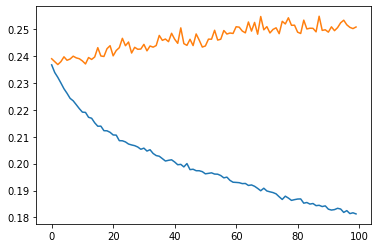

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

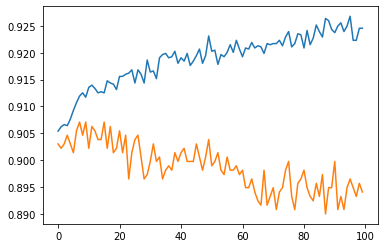

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1. NO OF HIDDEN LAYERS 

In [ ]:
accuracy_validation = [None]*10
for hiddenLayersCount in range(0,10):
    
    model = Sequential()
    # First Layer
    model.add(Dense( 10, activation = 'relu', input_dim = 20))
    i=0
    # N Number of Hidden Layers
    while(i < hiddenLayersCount):
        model.add(Dense( 10,  activation = 'relu'))
        i+=1
    
    # Final Layer
    model.add(Dense( 1,  activation = 'sigmoid'))
    
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.fit(X_train, y_train.values, batch_size = 10, epochs = 4)
    accuracy_validation[hiddenLayersCount]=np.round(accuracy_NN(model,X_test, y_test) * 100, 2)

Epoch 1/4
614/614 [==============================] - 2s 2ms/step - loss: 0.4352 - accuracy: 0.7913
Epoch 2/4
614/614 [==============================] - 1s 2ms/step - loss: 0.3236 - accuracy: 0.8602
Epoch 3/4
614/614 [==============================] - 1s 2ms/step - loss: 0.3006 - accuracy: 0.8705
Epoch 4/4
614/614 [==============================] - 1s 2ms/step - loss: 0.2880 - accuracy: 0.8787
Epoch 1/4
614/614 [==============================] - 2s 2ms/step - loss: 0.4318 - accuracy: 0.7900
Epoch 2/4
614/614 [==============================] - 1s 2ms/step - loss: 0.3103 - accuracy: 0.8630
Epoch 3/4
614/614 [==============================] - 1s 2ms/step - loss: 0.2902 - accuracy: 0.8728
Epoch 4/4
614/614 [==============================] - 1s 2ms/step - loss: 0.2815 - accuracy: 0.8772
Epoch 1/4
614/614 [==============================] - 2s 2ms/step - loss: 0.4454 - accuracy: 0.7608
Epoch 2/4
614/614 [==============================] - 1s 2ms/step - loss: 0.3183 - accuracy: 0.8537
Epoch 3/4


Text(0, 0.5, 'Accuracy on Validation Set')

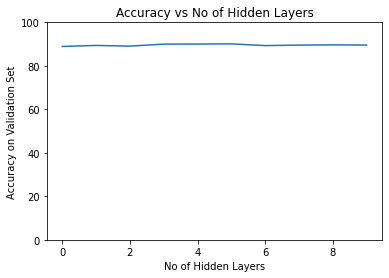

In [ ]:
plt.ylim([0,100])
plt.plot(accuracy_validation)
plt.title("Accuracy vs No of Hidden Layers")
plt.xlabel("No of Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

Number of Hidden layers won't increase significant accuracy,
We will keep only 1 hidden layer in the NN

2. No of Nodes in Hidden Layer

In [ ]:
accuracy_validation = [None]*10
count = 0
for noOfNodes in range(10,20):
    
    classifier = Sequential()
    # First Layer + Hidden Layer
    classifier.add(Dense(noOfNodes, activation = 'relu', input_dim = 20))
    
    # Second Hidden Layer
    classifier.add(Dense( noOfNodes, activation = 'relu'))

    # Final Layer
    classifier.add(Dense(1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, epochs = 4)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)
    count+=1

Epoch 1/4
614/614 [==============================] - 2s 2ms/step - loss: 0.4554 - accuracy: 0.7872
Epoch 2/4
614/614 [==============================] - 1s 2ms/step - loss: 0.3080 - accuracy: 0.8627
Epoch 3/4
614/614 [==============================] - 1s 2ms/step - loss: 0.2864 - accuracy: 0.8752
Epoch 4/4
614/614 [==============================] - 1s 2ms/step - loss: 0.2755 - accuracy: 0.8814
Epoch 1/4
614/614 [==============================] - 2s 2ms/step - loss: 0.3900 - accuracy: 0.8160
Epoch 2/4
614/614 [==============================] - 1s 2ms/step - loss: 0.3063 - accuracy: 0.8673
Epoch 3/4
614/614 [==============================] - 1s 2ms/step - loss: 0.2830 - accuracy: 0.8785
Epoch 4/4
614/614 [==============================] - 1s 2ms/step - loss: 0.2697 - accuracy: 0.8870
Epoch 1/4
614/614 [==============================] - 2s 2ms/step - loss: 0.3893 - accuracy: 0.8226
Epoch 2/4
614/614 [==============================] - 1s 2ms/step - loss: 0.2926 - accuracy: 0.8762
Epoch 3/4


Text(0, 0.5, 'Accuracy on Validation Set')

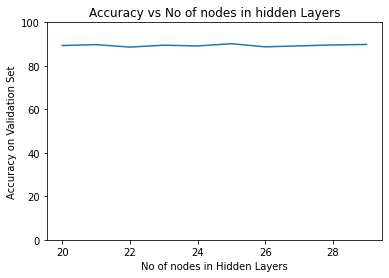

In [ ]:
plt.ylim([0,100])
plt.plot(range(20,30),accuracy_validation)
plt.title("Accuracy vs No of nodes in hidden Layers")
plt.xlabel("No of nodes in Hidden Layers")
plt.ylabel("Accuracy on Validation Set")


No of layers according to our data set doesn't really change the accuracy
We can go ahead with 10 number of Nodes

3. Change Activation Function

In [ ]:
accuracy_validation = [None]*3
count = 0
activationFunc = ['relu','sigmoid','tanh']
for activation_Func in range(len(activationFunc)):
    
    classifier = Sequential()

    classifier.add(Dense(10, activation = 'relu', input_dim = 20))
    
    classifier.add(Dense(10,activation = 'relu'))

    classifier.add(Dense(1, activation = activationFunc[activation_Func]))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, epochs = 4)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)
    count+=1

Epoch 1/4
614/614 [==============================] - 2s 2ms/step - loss: 1.8370 - accuracy: 0.7453
Epoch 2/4
614/614 [==============================] - 1s 2ms/step - loss: 0.4504 - accuracy: 0.8123
Epoch 3/4
614/614 [==============================] - 2s 2ms/step - loss: 0.4127 - accuracy: 0.8389
Epoch 4/4
614/614 [==============================] - 1s 2ms/step - loss: 0.3811 - accuracy: 0.8464
Epoch 1/4
614/614 [==============================] - 2s 2ms/step - loss: 0.4516 - accuracy: 0.7818
Epoch 2/4
614/614 [==============================] - 1s 2ms/step - loss: 0.3178 - accuracy: 0.8609
Epoch 3/4
614/614 [==============================] - 1s 2ms/step - loss: 0.2980 - accuracy: 0.8726
Epoch 4/4
614/614 [==============================] - 1s 2ms/step - loss: 0.2875 - accuracy: 0.8748
Epoch 1/4
614/614 [==============================] - 2s 2ms/step - loss: 0.9540 - accuracy: 0.7498
Epoch 2/4
614/614 [==============================] - 2s 2ms/step - loss: 0.4231 - accuracy: 0.7859
Epoch 3/4


Text(0, 0.5, 'Accuracy on Validation Set')

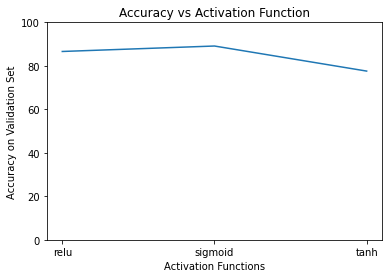

In [ ]:


plt.ylim([0,100])
plt.plot(activationFunc,accuracy_validation)
plt.title("Accuracy vs Activation Function")
plt.xlabel("Activation Functions")
plt.ylabel("Accuracy on Validation Set")



We will use sigmoid activation function

4. Batch size for error back propagation

In [ ]:


accuracy_validation = [None]*10
count = 0
for batchSize in range(5,15):
    
    classifier = Sequential()
    classifier.add(Dense(10, activation = 'relu', input_dim = 20))
    classifier.add(Dense(10, activation = 'relu'))

    
    # Final Layer
    classifier.add(Dense(1, activation = 'relu'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = batchSize, epochs = 3)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)
    count+=1



Epoch 1/3
1227/1227 [==============================] - 3s 2ms/step - loss: 0.6105 - accuracy: 0.8216
Epoch 2/3
1227/1227 [==============================] - 3s 2ms/step - loss: 0.3919 - accuracy: 0.8478
Epoch 3/3
1227/1227 [==============================] - 3s 2ms/step - loss: 0.4014 - accuracy: 0.8545
Epoch 1/3
1022/1022 [==============================] - 2s 2ms/step - loss: 0.8843 - accuracy: 0.7921
Epoch 2/3
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3976 - accuracy: 0.8496
Epoch 3/3
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3751 - accuracy: 0.8469
Epoch 1/3
876/876 [==============================] - 3s 2ms/step - loss: 1.0900 - accuracy: 0.6937
Epoch 2/3
876/876 [==============================] - 2s 2ms/step - loss: 0.4716 - accuracy: 0.7753
Epoch 3/3
876/876 [==============================] - 2s 2ms/step - loss: 0.4092 - accuracy: 0.7992
Epoch 1/3
767/767 [==============================] - 6s 6ms/step - loss: 1.3846 - accuracy: 0.743

Text(0, 0.5, 'Accuracy on Validation Set')

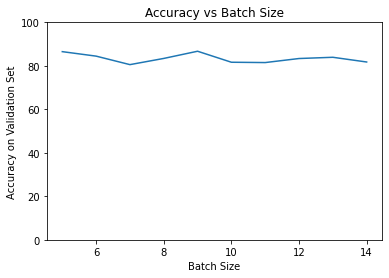

In [ ]:


plt.ylim([0,100])
plt.plot(range(5,15),accuracy_validation)
plt.title("Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy on Validation Set")



Batch Size is good for 9

FINAL ANN

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(10, activation = 'sigmoid', input_dim = 20))

# Adding the second hidden layer
# classifier.add(Dense(10, activation = 'sigmoid'))

# Adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 9, epochs = 20)

Epoch 1/20
682/682 [==============================] - 5s 5ms/step - loss: 0.5628 - accuracy: 0.7466
Epoch 2/20
682/682 [==============================] - 3s 4ms/step - loss: 0.3869 - accuracy: 0.8271
Epoch 3/20
682/682 [==============================] - 2s 3ms/step - loss: 0.3352 - accuracy: 0.8581
Epoch 4/20
682/682 [==============================] - 2s 3ms/step - loss: 0.3223 - accuracy: 0.8620
Epoch 5/20
682/682 [==============================] - 2s 3ms/step - loss: 0.3129 - accuracy: 0.8629
Epoch 6/20
682/682 [==============================] - 2s 2ms/step - loss: 0.3026 - accuracy: 0.8682
Epoch 7/20
682/682 [==============================] - 2s 2ms/step - loss: 0.2904 - accuracy: 0.8764
Epoch 8/20
682/682 [==============================] - 2s 2ms/step - loss: 0.2805 - accuracy: 0.8836
Epoch 9/20
682/682 [==============================] - 2s 2ms/step - loss: 0.2698 - accuracy: 0.8891
Epoch 10/20
682/682 [==============================] - 2s 2ms/step - loss: 0.2641 - accuracy: 0.8911

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(10, activation = 'relu', input_dim = 20))

# Adding the second hidden layer
classifier.add(Dense(10, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 9, epochs = 20)

Epoch 1/20
682/682 [==============================] - 3s 3ms/step - loss: 0.5217 - accuracy: 0.7466
Epoch 2/20
682/682 [==============================] - 2s 3ms/step - loss: 0.3145 - accuracy: 0.8219
Epoch 3/20
682/682 [==============================] - 2s 3ms/step - loss: 0.2874 - accuracy: 0.9008
Epoch 4/20
682/682 [==============================] - 2s 3ms/step - loss: 0.2703 - accuracy: 0.8997
Epoch 5/20
682/682 [==============================] - 2s 2ms/step - loss: 0.2619 - accuracy: 0.8992
Epoch 6/20
682/682 [==============================] - 2s 2ms/step - loss: 0.2539 - accuracy: 0.9044
Epoch 7/20
682/682 [==============================] - 2s 2ms/step - loss: 0.2500 - accuracy: 0.9023
Epoch 8/20
682/682 [==============================] - 2s 2ms/step - loss: 0.2453 - accuracy: 0.9049
Epoch 9/20
682/682 [==============================] - 2s 3ms/step - loss: 0.2423 - accuracy: 0.9039
Epoch 10/20
682/682 [==============================] - 2s 3ms/step - loss: 0.2376 - accuracy: 0.9053

In [ ]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))


Train accuracy = 90.35%
Test accuracy = 90.41%


In [ ]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))



Train accuracy = 91.85%
Test accuracy = 91.78%


USING GRIDSEARCHCV ON THE MODELS

1. Hyperparameters: Batch size and # of Epochs

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import SGD
from keras.constraints import maxnorm
from warnings import filterwarnings

In [ ]:
#c_train = c[X.index.isin(X_train.index)]
#c_test = c[~X.index.isin(X_train.index)]
#bike_df["Rented_Bike_Count_Value"]

In [ ]:
def model_1():
    model = Sequential()
    #model.add(Input(shape = (40, )))
    model.add(Dense(10, activation = 'sigmoid'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
    return model



In [ ]:
nnc1_model = KerasClassifier(build_fn = model_1, verbose = 0)

nnc1_batch_size_arr = [10, 20, 50]
nnc1_epoch_arr = [10, 50, 100]

nnc1 = GridSearchCV(estimator = nnc1_model, 
                    param_grid = {'batch_size' : nnc1_batch_size_arr, 
                                  'epochs' : nnc1_epoch_arr}, 
                    n_jobs = -1, cv = 5, return_train_score = True)

nnc1.fit(X_train.values, y_train.values.ravel())

nnc1_df = pd.DataFrame(nnc1.cv_results_)

Best Parameters: {'batch_size': 10, 'epochs': 100}
Best Cross-Validation Accuracy: 0.89


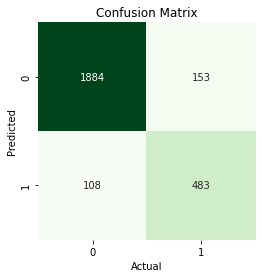

Accuracy: 0.90
Sensitivity: 0.76
Specificity: 0.95


In [ ]:
import seaborn as sns
print('Best Parameters: {}'.format(nnc1.best_params_))
print('Best Cross-Validation Accuracy: {:.2f}'.format(nnc1.best_score_))

pred_nnc1 = nnc1.predict(X_test)

# plot_roc_curve(nnc1, X_test, c_test)
# plt.title('ROC Curve')
# plt.show()

cm_nnc1 = confusion_matrix(y_test, pred_nnc1)
tn, fp, fn, tp = cm_nnc1.ravel()

ax = sns.heatmap(cm_nnc1.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Greens')
ax.set(xlabel = 'Actual', ylabel = 'Predicted', title = 'Confusion Matrix')
plt.show()

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_nnc1)))
print('Sensitivity: {:.2f}'.format(tp / (tp + fn)))
print('Specificity: {:.2f}'.format(tn / (tn + fp)))

2. Activation Function of the 1st hidden layer nodes

In [ ]:
def model_2(activation = 'sigmoid'):
    model = Sequential()
    model.add(Dense(10, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
    return model

In [ ]:
nnc2_model = KerasClassifier(build_fn = model_2, batch_size = 10, epochs = 100, verbose = 0)

nnc2_activation_arr = ['linear', 'relu', 'sigmoid', 'tanh']

nnc2 = GridSearchCV(estimator = nnc2_model, 
                    param_grid = {'activation' : nnc2_activation_arr}, 
                    n_jobs = -1, cv = 5, return_train_score = True)

nnc2.fit(X_train.values, y_train.values.ravel())

nnc2_df = pd.DataFrame(nnc2.cv_results_)

In [ ]:
nnc2_df[['param_activation', 'mean_train_score', 'mean_test_score']]

,param_activation,mean_train_score,mean_test_score
0,linear,0.860038,0.858285
1,relu,0.908879,0.899216
2,sigmoid,0.889677,0.884377
3,tanh,0.908553,0.896281


Best Parameters: {'activation': 'relu'}
Best Cross-Validation Accuracy: 0.90


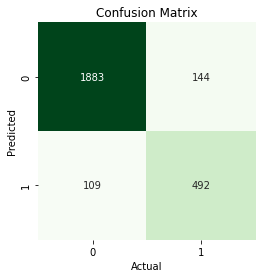

Accuracy: 0.90
Sensitivity: 0.77
Specificity: 0.95


In [ ]:
print('Best Parameters: {}'.format(nnc2.best_params_))
print('Best Cross-Validation Accuracy: {:.2f}'.format(nnc2.best_score_))

pred_nnc2 = nnc2.predict(X_test)

# plot_roc_curve(nnc2, X_test, c_test)
# plt.title('ROC Curve')
# plt.show()

cm_nnc2 = confusion_matrix(y_test, pred_nnc2)
tn, fp, fn, tp = cm_nnc2.ravel()

ax = sns.heatmap(cm_nnc2.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Greens')
ax.set(xlabel = 'Actual', ylabel = 'Predicted', title = 'Confusion Matrix')
plt.show()

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_nnc2)))
print('Sensitivity: {:.2f}'.format(tp / (tp + fn)))
print('Specificity: {:.2f}'.format(tn / (tn + fp)))

3.Learning Rate and Momentum of the 1st hidden layer nodes (Not running as computationally expensive)

In [ ]:
def model_3(learn_rate = 0.01, momentum = 0.0):
    model = Sequential()
    model.add(Dense(6, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = keras.optimizers.SGD(lr = learn_rate, momentum = momentum)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model

In [ ]:
nnc3_model = KerasClassifier(build_fn = model_3, batch_size = 10, epochs = 100, verbose = 0)

nnc3_learn_rate_arr = [0.001, 0.01, 0.1, 0.2, 0.5]
nnc3_momentum_arr = [0.0, 0.1, 0.2, 0.5, 0.9]
 
nnc3 = GridSearchCV(estimator = nnc3_model, 
                    param_grid = {'learn_rate' : nnc3_learn_rate_arr,
                                  'momentum' : nnc3_momentum_arr}, 
                    n_jobs = -1, cv = 5, return_train_score = True)

nnc3.fit(X_train.values, y_train.values.ravel())

nnc3_df = pd.DataFrame(nnc3.cv_results_)

In [ ]:
jnnc3_train_err_mat = (1 - nnc3_df['mean_train_score']).values.reshape(len(nnc3_learn_rate_arr), len(nnc3_momentum_arr))
ax = sns.heatmap(pd.DataFrame(nnc3_train_err_mat, columns = nnc3_momentum_arr, index = nnc3_learn_rate_arr).iloc[::-1], 
                 annot = True, cmap = 'Greens_r')
ax.set(xlabel = 'Momentum', ylabel = 'Learning Rate', title = 'Train Error Rate vs Tuning Parameters')
plt.show()

nnc3_cv_err_mat = (1 - nnc3_df['mean_test_score']).values.reshape(len(nnc3_learn_rate_arr), len(nnc3_momentum_arr))
ax = sns.heatmap(pd.DataFrame(nnc3_cv_err_mat, columns = nnc3_momentum_arr, index = nnc3_learn_rate_arr).iloc[::-1], 
                 annot = True, cmap = 'Greens_r')
ax.set(xlabel = 'Momentum', ylabel = 'Learning Rate', title = 'CV Error Rate vs Tuning Parameters')
plt.show()

In [ ]:


print('Best Parameters: {}'.format(nnc3.best_params_))
print('Best Cross-Validation Accuracy: {:.2f}'.format(nnc3.best_score_))

pred_nnc3 = nnc3.predict(X_test)

# plot_roc_curve(nnc3, X_test, c_test)
# plt.title('ROC Curve')
# plt.show()

cm_nnc3 = confusion_matrix(y_test, pred_nnc3)
tn, fp, fn, tp = cm_nnc3.ravel()

ax = sns.heatmap(cm_nnc3.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Greens')
ax.set(xlabel = 'Actual', ylabel = 'Predicted', title = 'Confusion Matrix')
plt.show()

print('Accuracy: {:.2f}'.format(accuracy_score(c_test, pred_nnc3)))
print('Sensitivity: {:.2f}'.format(tp / (tp + fn)))
print('Specificity: {:.2f}'.format(tn / (tn + fp)))



4.Drop-out Rate and Weight Constraint of the 1st hidden layer nodes(Not running as computationally expensive)

In [ ]:
def model_4(dropout_rate = 0.0, weight_constraint = 0):
    model = Sequential()
    model.add(Dense(10, activation = 'relu', kernel_constraint = maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.9)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics= ['accuracy'])
    return model

In [ ]:
nnc4_model = KerasClassifier(build_fn = model_4, batch_size = 10, epochs = 100, verbose = 0)

nnc4_wgt_constraint_arr = [0, 1, 2, 3, 4, 5]
nnc4_dropout_rate_arr = [0.0, 0.1, 0.2, 0.5, 0.9]

nnc4 = GridSearchCV(estimator = nnc4_model, 
                    param_grid = {'weight_constraint' : nnc4_wgt_constraint_arr,
                                  'dropout_rate' : nnc4_dropout_rate_arr}, 
                    n_jobs = -1, cv = 5, return_train_score = True)

nnc4.fit(X_train.values, y_train.values.ravel())

nnc4_df = pd.DataFrame(nnc4.cv_results_)

In [ ]:
nnc4_train_err_mat = (1 - nnc4_df['mean_train_score']).values.reshape(len(nnc4_wgt_constraint_arr), 
                                                                      len(nnc4_dropout_rate_arr))
ax = sns.heatmap(pd.DataFrame(nnc4_train_err_mat, columns = nnc4_dropout_rate_arr, 
                              index = nnc4_wgt_constraint_arr).iloc[::-1], annot = True, cmap = 'Greens_r')
ax.set(xlabel = 'Drop-out Rate', ylabel = 'Max Norm Weight', title = 'Train Error Rate vs Tuning Parameters')
plt.show()

nnc4_cv_err_mat = (1 - nnc4_df['mean_test_score']).values.reshape(len(nnc4_wgt_constraint_arr), len(nnc4_dropout_rate_arr))
ax = sns.heatmap(pd.DataFrame(nnc4_cv_err_mat, columns = nnc4_dropout_rate_arr, 
                              index = nnc4_wgt_constraint_arr).iloc[::-1], annot = True, cmap = 'Greens_r')
ax.set(xlabel = 'Drop-out Rate', ylabel = 'Max Norm Weight', title = 'CV Error Rate vs Tuning Parameters')
plt.show()

In [ ]:
print('Best Parameters: {}'.format(nnc4.best_params_))
print('Best Cross-Validation Accuracy: {:.2f}'.format(nnc4.best_score_))

pred_nnc4 = nnc4.predict(X_test)

# plot_roc_curve(nnc4, X_test, c_test)
# plt.title('ROC Curve')
# plt.show()

cm_nnc4 = confusion_matrix(y_test, pred_nnc4)
tn, fp, fn, tp = cm_nnc4.ravel()

ax = sns.heatmap(cm_nnc4.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Greens')
ax.set(xlabel = 'Actual', ylabel = 'Predicted', title = 'Confusion Matrix')
plt.show()

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_nnc4)))
print('Sensitivity: {:.2f}'.format(tp / (tp + fn)))
print('Specificity: {:.2f}'.format(tn / (tn + fp)))

5. NO Of Neurons in First Hidden Layer

In [ ]:
def model_5(neurons = 0):
    model = Sequential()
    model.add(Dense(neurons, activation = 'relu', kernel_constraint = maxnorm(3)))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.9)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics= ['accuracy'])
    return model

In [ ]:
nnc5_model = KerasClassifier(build_fn = model_5, batch_size = 10, epochs = 100, verbose = 0)

nnc5_neuron_arr = [1, 5, 10, 15, 20, 25, 30]

nnc5 = GridSearchCV(estimator = nnc5_model, 
                    param_grid = {'neurons' : nnc5_neuron_arr}, 
                    n_jobs = -1, cv = 5, return_train_score = True)

nnc5.fit(X_train.values, y_train.values.ravel())

nnc5_df = pd.DataFrame(nnc5.cv_results_)

In [ ]:
nnc5_df[['param_neurons', 'mean_train_score', 'mean_test_score']]

,param_neurons,mean_train_score,mean_test_score
0,1,0.862076,0.859590
1,5,0.896119,0.885355
2,10,0.910225,0.898727
3,15,0.915688,0.901010
4,20,0.923394,0.905902
5,25,0.925024,0.903946
6,30,0.927266,0.909165


Best Parameters: {'neurons': 25}
Best Cross-Validation Accuracy: 0.91


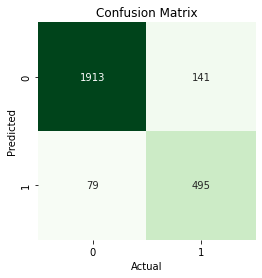

Accuracy: 0.92
Sensitivity: 0.78
Specificity: 0.96


In [ ]:
print('Best Parameters: {}'.format(nnc5.best_params_))
print('Best Cross-Validation Accuracy: {:.2f}'.format(nnc5.best_score_))

pred_nnc5 = nnc5.predict(X_test)

# plot_roc_curve(nnc5, X_test, c_test)
# plt.title('ROC Curve')
# plt.show()

cm_nnc5 = confusion_matrix(y_test, pred_nnc5)
tn, fp, fn, tp = cm_nnc5.ravel()

ax = sns.heatmap(cm_nnc5.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Greens')
ax.set(xlabel = 'Actual', ylabel = 'Predicted', title = 'Confusion Matrix')
plt.show()

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_nnc5)))
print('Sensitivity: {:.2f}'.format(tp / (tp + fn)))
print('Specificity: {:.2f}'.format(tn / (tn + fp)))

6. No Of Layers in Second Hidden Layer

In [ ]:
def model_6(neurons = 0):
    model = Sequential()
    model.add(Dense(10, activation = 'relu', kernel_constraint = maxnorm(3)))
    model.add(Dropout(0.1))
    model.add(Dense(neurons, activation = 'relu', kernel_constraint = maxnorm(3)))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.9)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics= ['accuracy'])
    return model

In [ ]:
nnc6_model = KerasClassifier(build_fn = model_6, batch_size = 10, epochs = 100, verbose = 0)

nnc6_neuron_arr = [1, 5, 10, 15, 20, 25, 30]

nnc6 = GridSearchCV(estimator = nnc6_model, 
                    param_grid = {'neurons' : nnc6_neuron_arr}, 
                    n_jobs = -1, cv = 5, return_train_score = True)

nnc6.fit(X_train.values, y_train.values.ravel())

nnc6_df = pd.DataFrame(nnc6.cv_results_)

In [ ]:
nnc6_df[['param_neurons', 'mean_train_score', 'mean_test_score']]

,param_neurons,mean_train_score,mean_test_score
0,1,0.909369,0.896771
1,5,0.911529,0.899054
2,10,0.912467,0.900685
3,15,0.913976,0.900032
4,20,0.912998,0.897422
5,25,0.917442,0.906717
6,30,0.916259,0.903945


Best Parameters: {'neurons': 25}
Best Cross-Validation Accuracy: 0.91


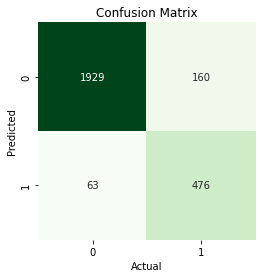

Accuracy: 0.92
Sensitivity: 0.75
Specificity: 0.97


In [ ]:
print('Best Parameters: {}'.format(nnc6.best_params_))
print('Best Cross-Validation Accuracy: {:.2f}'.format(nnc6.best_score_))

pred_nnc6 = nnc6.predict(X_test)

cm_nnc6 = confusion_matrix(y_test, pred_nnc6)
tn, fp, fn, tp = cm_nnc6.ravel()

ax = sns.heatmap(cm_nnc6.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Greens')
ax.set(xlabel = 'Actual', ylabel = 'Predicted', title = 'Confusion Matrix')
plt.show()

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_nnc6)))
print('Sensitivity: {:.2f}'.format(tp / (tp + fn)))
print('Specificity: {:.2f}'.format(tn / (tn + fp)))

In [ ]:
 
  # Train and evaluate models for all combinations of parameters specified in the init method. We would like to obtain following outputs:
  #   1. Training Accuracy and Error (Loss) for every model
  #   2. Test Accuracy and Error (Loss) for every model
  #   3. History Curve (Plot of Accuracy against training steps) for all the models in a single plot. The plot should be color coded i.e.different color for each model
def train_evaluate(actFunc,hidden_layer_size,epoch,lrate):
      #X_train, X_test, y_train, y_test = train_test_split(self.processed_data, self.y, test_size=0.2, shuffle = True, random_state =1)
      
      model = keras.Sequential()
      model.add(Dense(16, input_dim =20, kernel_initializer= 'normal' , activation= actFunc))
      if hidden_layer_size==3:
        model.add(Dense(10, kernel_initializer= 'normal' , activation= actFunc ))
      model.add(Dense(1, kernel_initializer= 'normal' , activation= actFunc ))
      
      # Compile model
      opt = keras.optimizers.Adam(learning_rate=lrate)
      model.compile(loss= 'mean_squared_error' , optimizer= opt , metrics=[ 'accuracy' ])
      history = model.fit(X_train, y_train, epochs= epoch, validation_data= (X_test,y_test), batch_size=20, verbose=0)
      y_pred = model.predict(X_test)
      pred_train= model.predict(X_train)
      train_scores = model.evaluate(X_train, y_train, verbose=0)
      print('Training Accuracy : {} \nTraining Error : {}'.format(round(train_scores[1],4), round(train_scores[0],4)))   
      
      pred_test= model.predict(X_test)
      test_scores = model.evaluate(X_test, y_test, verbose=0)
      print('Testing Accuracy : {} \nTesting Error : {}'.format(round(test_scores[1],4), round(test_scores[0],4))) 
    
      return history

def plot_training_graph( sigmoidHistory, tanhHistory, reluHistory, epoch, lrate, layers, ax):   
      ax.plot(sigmoidHistory.history['accuracy'], color='green', linestyle='solid')
      ax.plot(tanhHistory.history['accuracy'], color='red', linestyle='solid')
      ax.plot(reluHistory.history['accuracy'], color='blue', linestyle='solid')
      ax.plot(sigmoidHistory.history['loss'], color='green', linestyle='dashed')
      ax.plot(tanhHistory.history['loss'], color='red', linestyle='dashed')
      ax.plot(reluHistory.history['loss'], color='blue', linestyle='dashed')
      ax.set_title('Epoch='+str(Epoch)+', Learning Rate='+str(LearningRate)+', Hidden Layers='+str(Layers))       

def plot_testing_graph(sigmoidHistory, tanhHistory, reluHistory, epoch, lrate, layers, ax):
      ax.plot(sigmoidHistory.history['val_accuracy'], color='green', linestyle='solid')
      ax.plot(tanhHistory.history['val_accuracy'], color='red', linestyle='solid')
      ax.plot(reluHistory.history['val_accuracy'], color='blue', linestyle='solid')
      ax.plot(sigmoidHistory.history['val_loss'], color='green', linestyle='dashed')
      ax.plot(tanhHistory.history['val_loss'], color='red', linestyle='dashed')
      ax.plot(reluHistory.history['val_loss'], color='blue', linestyle='dashed')
      ax.set_title('Epoch='+str(Epoch)+', Learning Rate='+str(LearningRate)+', Hidden Layers='+str(Layers))


------------------------- Case - 1 -------------------------
Hidden Layers=2, Epoch=100, Learning Rate=0.001

-----------Sigmoid-----------
Training Accuracy : 0.9137 
Training Error : 0.0684
Testing Accuracy : 0.9091 
Testing Error : 0.0684

-----------Tanh-----------
Training Accuracy : 0.9114 
Training Error : 0.0694
Testing Accuracy : 0.9068 
Testing Error : 0.0711

-----------Relu-----------
Training Accuracy : 0.9103 
Training Error : 0.0708
Testing Accuracy : 0.906 
Testing Error : 0.0719

------------------------- Case - 2 -------------------------
Hidden Layers=3, Epoch=100, Learning Rate=0.001

-----------Sigmoid-----------
Training Accuracy : 0.9132 
Training Error : 0.0683
Testing Accuracy : 0.9113 
Testing Error : 0.0663

-----------Tanh-----------
Training Accuracy : 0.9253 
Training Error : 0.0566
Testing Accuracy : 0.9201 
Testing Error : 0.0616

-----------Relu-----------
Training Accuracy : 0.9163 
Training Error : 0.062
Testing Accuracy : 0.9113 
Testing Error : 0.0

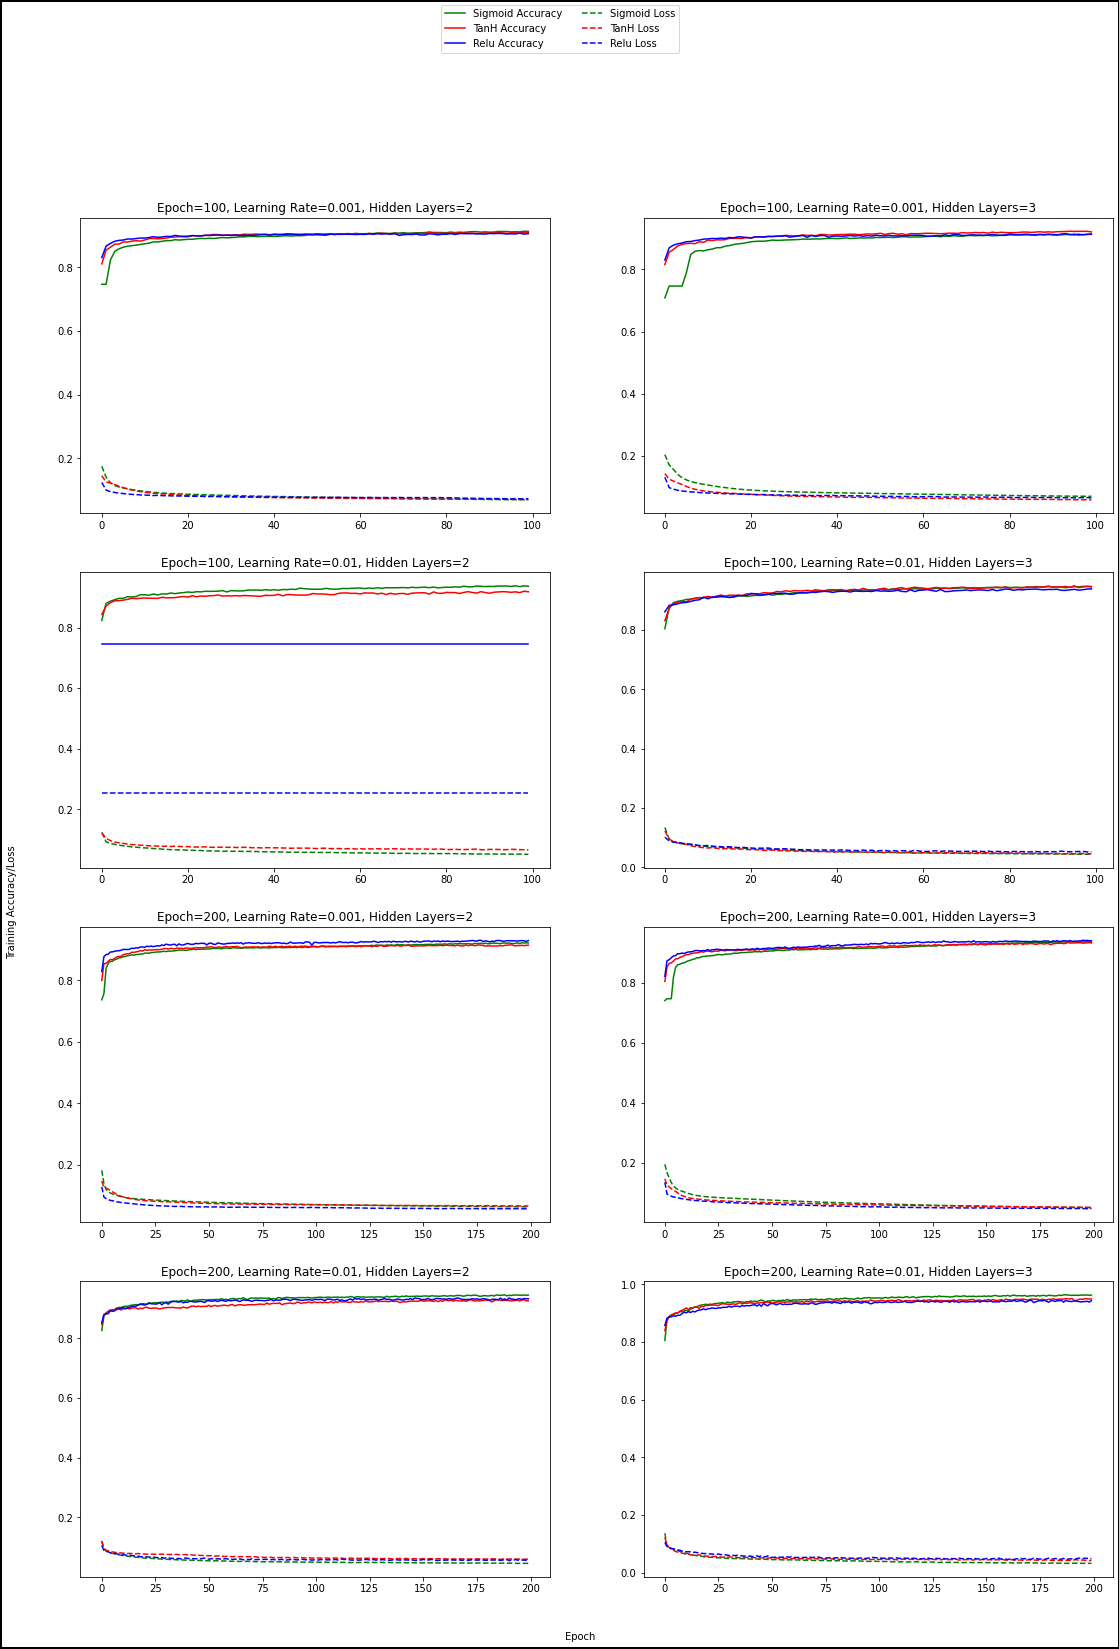

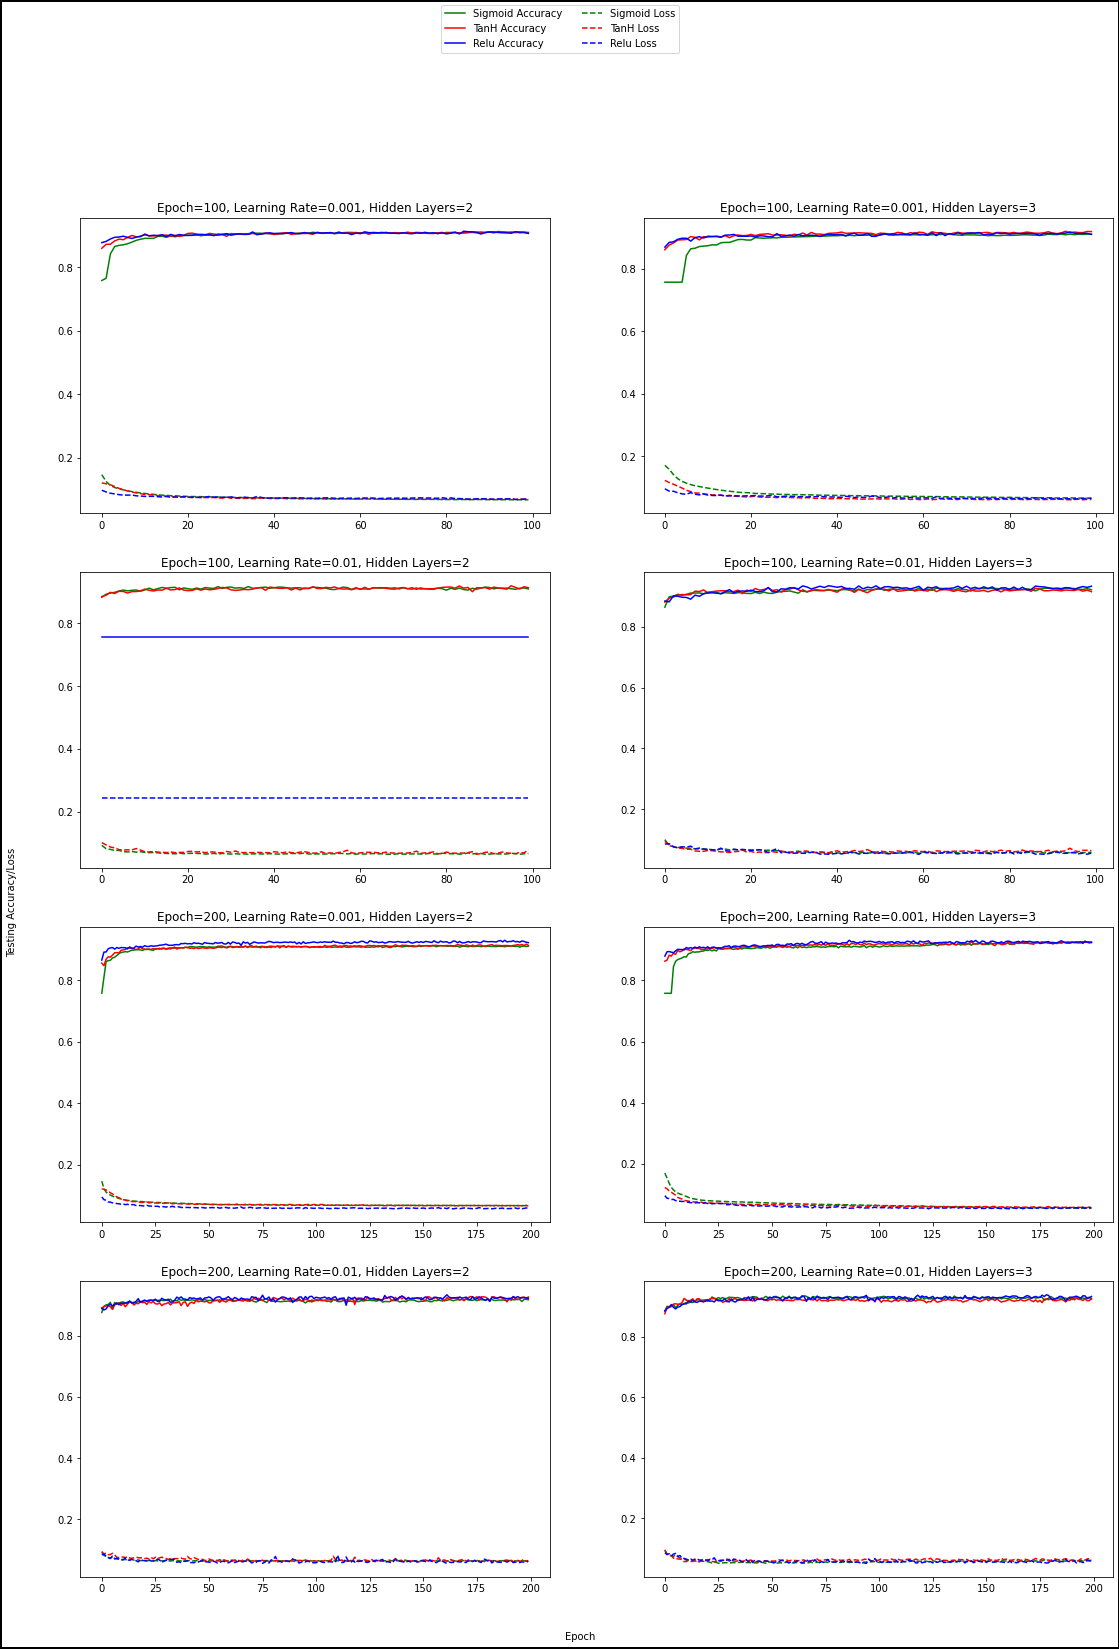

In [ ]:
# List of hyperparameters to be used for for model evaluation
hpList = [{'epoch' : 100, 'learning_rate' : 0.001, 'layers' : 2},
              {'epoch' : 100, 'learning_rate' : 0.001, 'layers' : 3},
              {'epoch' : 100, 'learning_rate' : 0.01, 'layers' : 2},
              {'epoch' : 100, 'learning_rate' : 0.01, 'layers' : 3},
              {'epoch' : 200, 'learning_rate' : 0.001, 'layers' : 2},
              {'epoch' : 200, 'learning_rate' : 0.001, 'layers' : 3},
              {'epoch' : 200, 'learning_rate' : 0.01, 'layers' : 2},
              {'epoch' : 200, 'learning_rate' : 0.01, 'layers' : 3},
             ]
            
count=0;
labels = ["Sigmoid Accuracy", "TanH Accuracy","Relu Accuracy","Sigmoid Loss","TanH Loss","Relu Loss"]

fig1 = plt.figure(edgecolor='black', linewidth=4)
fig2 = plt.figure(edgecolor='black', linewidth=4)

for dic in hpList:
        count=count+1
        print('\n------------------------- Case -',count, '-------------------------')
        Layers = dic.get('layers')
        Epoch = dic.get('epoch')
        LearningRate = dic.get('learning_rate')
        print(f'Hidden Layers={Layers}, Epoch={Epoch}, Learning Rate={LearningRate}')
        print('\n-----------Sigmoid-----------')
        sigmoidHistory = train_evaluate('sigmoid',Layers,Epoch,LearningRate)

        print('\n-----------Tanh-----------')
        tanhHistory = train_evaluate('tanh',Layers,Epoch,LearningRate)

        print('\n-----------Relu-----------')
        reluHistory = train_evaluate('relu',Layers,Epoch,LearningRate)

        ax1 = fig1.add_subplot(4,2,count)
        ax2 = fig2.add_subplot(4,2,count)
        plot_training_graph(sigmoidHistory, tanhHistory, reluHistory, Epoch, LearningRate, Layers, ax1)
        plot_testing_graph(sigmoidHistory, tanhHistory, reluHistory, Epoch, LearningRate, Layers, ax2)

#Plot the model history for each model in a single plot    
fig1.legend(ax1.get_lines(), labels, ncol=2, loc="upper center")
fig2.legend(ax2.get_lines(), labels, ncol=2, loc="upper center")

fig1.set_size_inches(18.5, 25, forward=True)
fig2.set_size_inches(18.5, 25, forward=True)

fig1.text(0.5, 0.09, 'Epoch', ha='center')
fig1.text(0.07, 0.5, 'Training Accuracy/Loss', va='center', rotation='vertical')

fig2.text(0.5, 0.09, 'Epoch', ha='center')
fig2.text(0.07, 0.5, 'Testing Accuracy/Loss', va='center', rotation='vertical')

plt.show()